In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import randint
from sklearn.preprocessing import StandardScaler


In [2]:
!pip install scikit-learn

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Data Mining/heart.csv')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
print(df.shape)
print(df.describe())
print(df.info())

(1025, 14)
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    

PREPROCESSING DATA

In [6]:
#missing data
total = df.isnull().sum().sort_values(ascending=False) # Changed train_df to df
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False) # Changed train_df to df
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

          Total  Percent
age           0      0.0
sex           0      0.0
cp            0      0.0
trestbps      0      0.0
chol          0      0.0
fbs           0      0.0
restecg       0      0.0
thalach       0      0.0
exang         0      0.0
oldpeak       0      0.0
slope         0      0.0
ca            0      0.0
thal          0      0.0
target        0      0.0


In [7]:
duplicate_rows = df[df.duplicated()]

# If duplicate_rows is empty, there are no duplicates
if duplicate_rows.empty:
    print("No Duplicate Row Exists")
else:
    print("Duplicate Rows Found")
(duplicate_rows)

Duplicate Rows Found


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [8]:
duplicate_rows = df[df.duplicated(keep=False)]

# If duplicate_rows is empty, there are no duplicates
if duplicate_rows.empty:
    print("No Duplicate Row Exists")
else:
    print("Duplicate Rows Found")

    # Find one duplicate row
    duplicate_row = duplicate_rows.iloc[0]

    # Find the index of the first occurrence of this duplicate row
    original_index = df[df.duplicated(keep='first')].index[0]

    # Print the duplicate row and its original index
    print(f"Duplicate Row:\n{duplicate_row}")
    print(f"Original row index of this duplicate: {original_index}")

Duplicate Rows Found
Duplicate Row:
age          52.0
sex           1.0
cp            0.0
trestbps    125.0
chol        212.0
fbs           0.0
restecg       1.0
thalach     168.0
exang         0.0
oldpeak       1.0
slope         2.0
ca            2.0
thal          3.0
target        0.0
Name: 0, dtype: float64
Original row index of this duplicate: 15


In [9]:
# Count the frequency of each unique row
row_counts = df.groupby(df.columns.tolist()).size().reset_index(name='Count')

# Merge the frequency (Count) back with the original dataset
data_with_counts = pd.merge(df, row_counts, on=df.columns.tolist(), how='left')

# Calculate weights based on the frequency (Count) — you can choose different ways to assign weights
# Option 1: Assign weight as the count itself
data_with_counts['Weight'] = data_with_counts['Count']

# Option 2: Normalize the weights so they sum to 1 (if needed)
data_with_counts['Weight'] = data_with_counts['Count'] / data_with_counts['Count'].sum()

data_with_counts.drop('Count', inplace=True, axis=1)
# Show the dataset with weights
(data_with_counts)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Weight
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,0.00112
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,0.00112
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,0.00112
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,0.00112
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,0.00084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,0.00084
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,0.00084
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,0.00112
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,0.00084


In [10]:
(data_with_counts).shape
dropped_df = data_with_counts.drop_duplicates(inplace=False)
dropped_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Weight
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,0.00112
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,0.00112
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,0.00112
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,0.00112
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,0.00084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,0.00084
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1,0.00084
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0,0.00084
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,0.00084


Duplicated Drop vs Normal vs Weight Correlation
Dalam analisis ini, kami membandingkan matriks korelasi dari set data dalam tiga kondisi yang berbeda:

Normal Data: Matriks korelasi dari dataset asli tanpa modifikasi apa pun.

Dropped Duplicates: Matriks korelasi setelah menghapus baris duplikat dari set data.

With Weight Column: Matriks korelasi setelah menambahkan kolom bobot berdasarkan frekuensi kemunculan dalam set data.

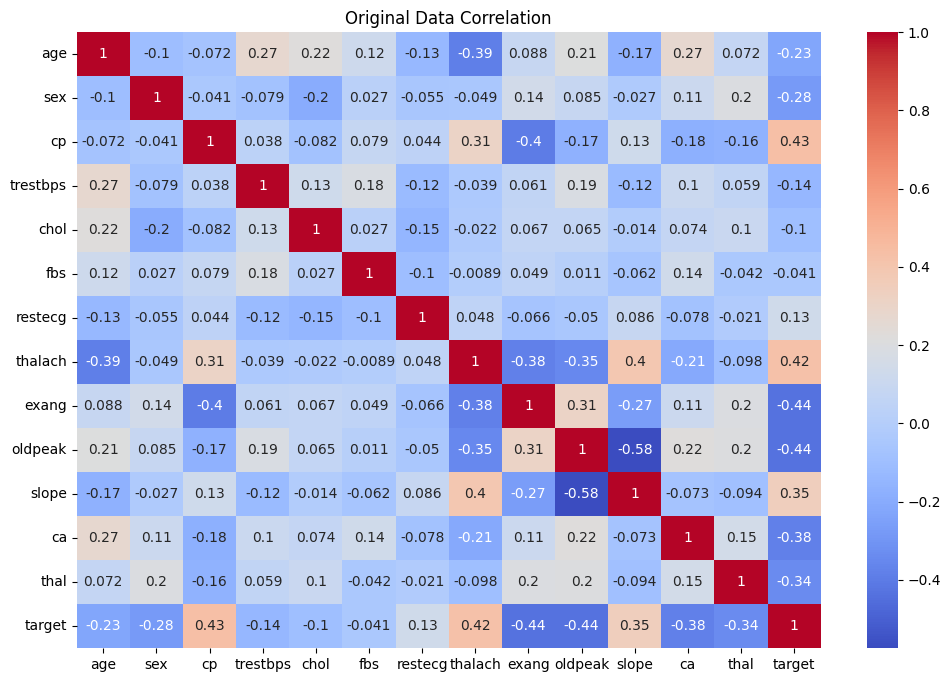

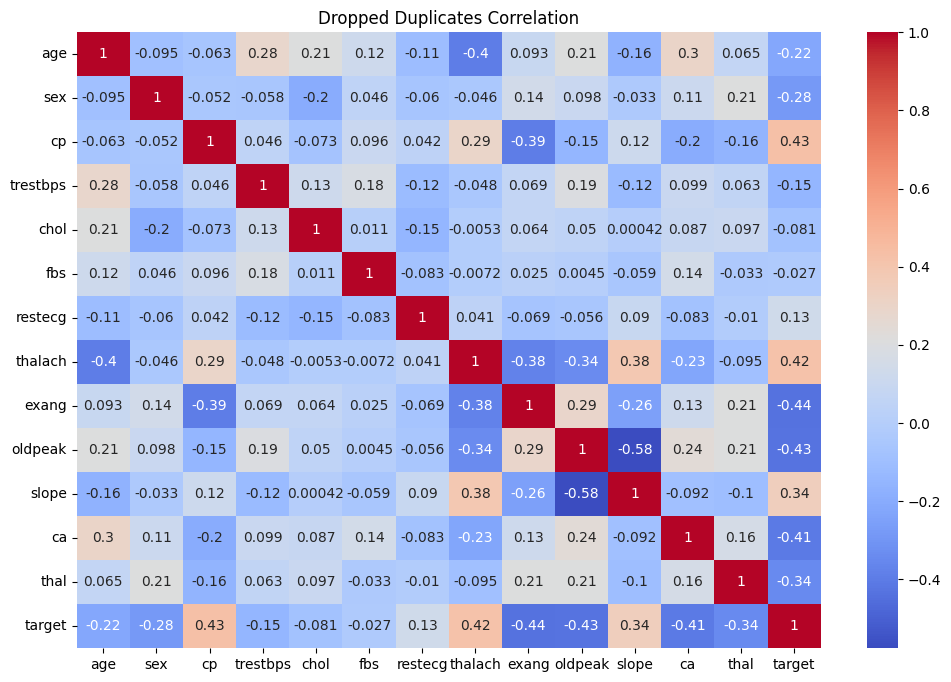

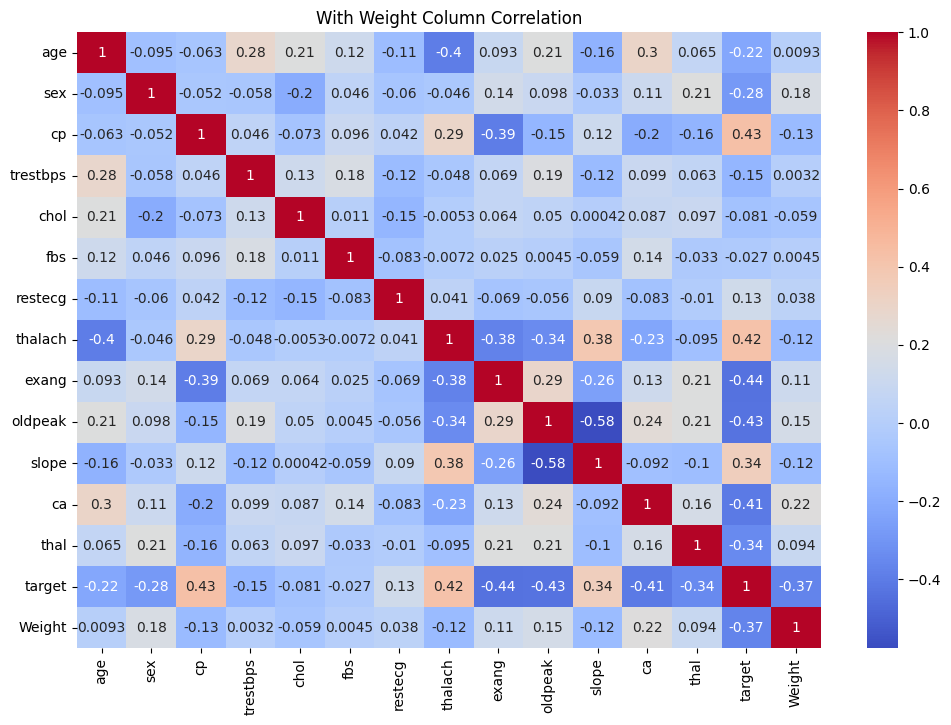

In [11]:
# 1. Original Data (Normal)
corr_normal = df.corr()

# 2. Data with Duplicates Dropped
data_without_duplicates = df.drop_duplicates()
corr_dropped_duplicates = data_without_duplicates.corr()

# 3. Data with Weight Column (Adding the Weight Column if not already added)


# Calculate correlation with weight column
corr_with_weight = dropped_df.corr()


# Plot the original correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(corr_normal, annot=True, cmap="coolwarm")
plt.title("Original Data Correlation")
plt.show()

# Plot the correlation matrix after dropping duplicates
plt.figure(figsize=(12,8))
sns.heatmap(corr_dropped_duplicates, annot=True, cmap="coolwarm")
plt.title("Dropped Duplicates Correlation")
plt.show()

# Plot the correlation matrix with weight column
plt.figure(figsize=(12,8))
sns.heatmap(corr_with_weight, annot=True, cmap="coolwarm")
plt.title("With Weight Column Correlation")
plt.show()

Kesimpulan
Dari hasil analisis, matriks korelasi untuk data asli dan data dengan kolom bobot hampir sama. Hal ini menunjukkan bahwa menambahkan kolom bobot berdasarkan frekuensi kemunculan tidak mengubah hubungan antar variabel secara signifikan. Koefisien korelasi tetap sangat mirip pada kedua kasus, yang menunjukkan bahwa penyertaan bobot tidak memiliki dampak yang kuat terhadap hubungan linear antara variabel.

Singkatnya, pembobotan berbasis frekuensi tidak terlalu mempengaruhi struktur korelasi dalam dataset ini.


EXPLORASI DATA ANALYSIS

In [12]:
print(min(df["chol"].unique()) , max(df["chol"].unique()))
df['age'].nunique()

126 564


41

<ipython-input-13-42e1293e93eb>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data_frame, palette='Set2', ax=axes[cor[0], cor[1]])
<ipython-input-13-42e1293e93eb>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data_frame, palette='Set2', ax=axes[cor[0], cor[1]])
<ipython-input-13-42e1293e93eb>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data_frame, palette='Set2', ax=axes[cor[0], cor[1]])
<ipython-input-13-42e1293e93eb>:9: FutureWarning: 

Passing `palette` without assigning `hue` 

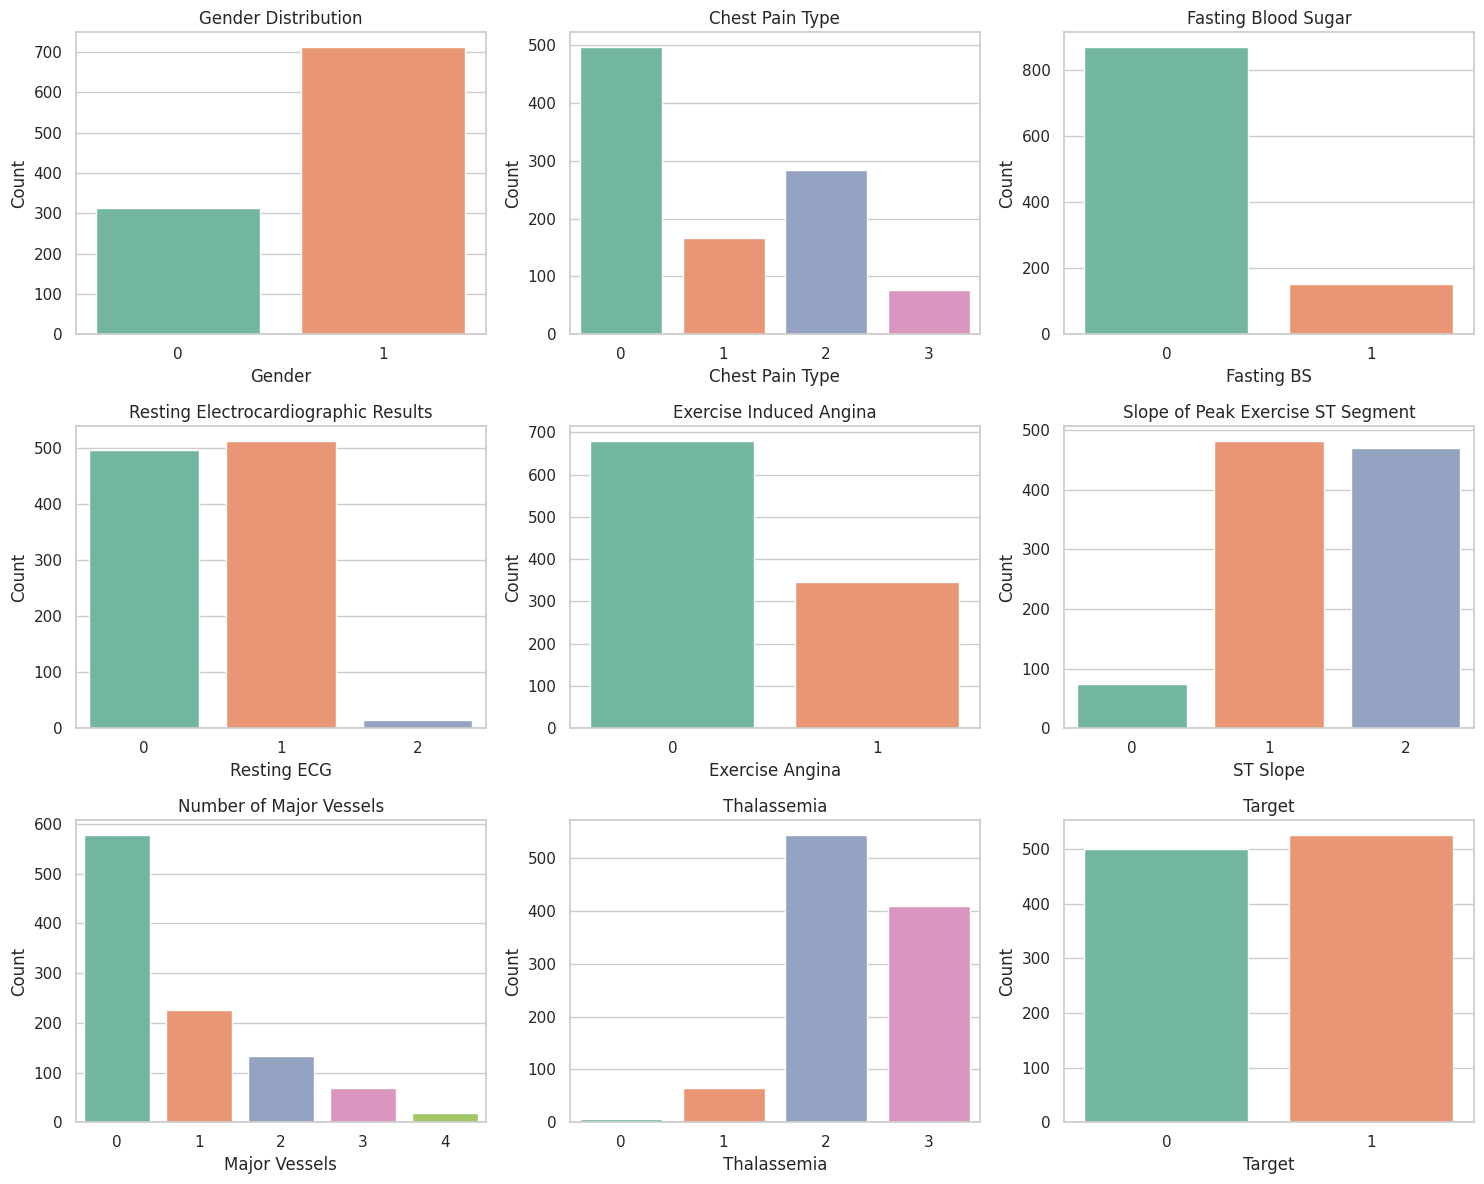

In [13]:
# Set the style for the plots
sns.set(style="whitegrid")

# Set the figure size (15x12 inches)
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# Function to create count plots
def count_plot(column, data_frame, cor, title, label):
    sns.countplot(x=column, data=data_frame, palette='Set2', ax=axes[cor[0], cor[1]])
    axes[cor[0], cor[1]].set_title(title)
    axes[cor[0], cor[1]].set_xlabel(label)
    axes[cor[0], cor[1]].set_ylabel('Count')

# List of columns and corresponding titles and labels
columns = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal" , "target"]
titles = ["Gender Distribution", "Chest Pain Type", "Fasting Blood Sugar", "Resting Electrocardiographic Results",
          "Exercise Induced Angina", "Slope of Peak Exercise ST Segment", "Number of Major Vessels",
          "Thalassemia" , 'Target']
labels = ["Gender", "Chest Pain Type", "Fasting BS", "Resting ECG", "Exercise Angina", "ST Slope", "Major Vessels", "Thalassemia" , "Target"]

# Loop through the columns, titles, and labels, and plot
for i, column in enumerate(columns):
  count_plot(column, df, (i//3, i%3), titles[i], labels[i])

# Adjust layout to avoid overlapping and improve spacing
plt.tight_layout()

# Show the plot
plt.show()

Skewness and Kurtosis Analysis for Numeric Columns

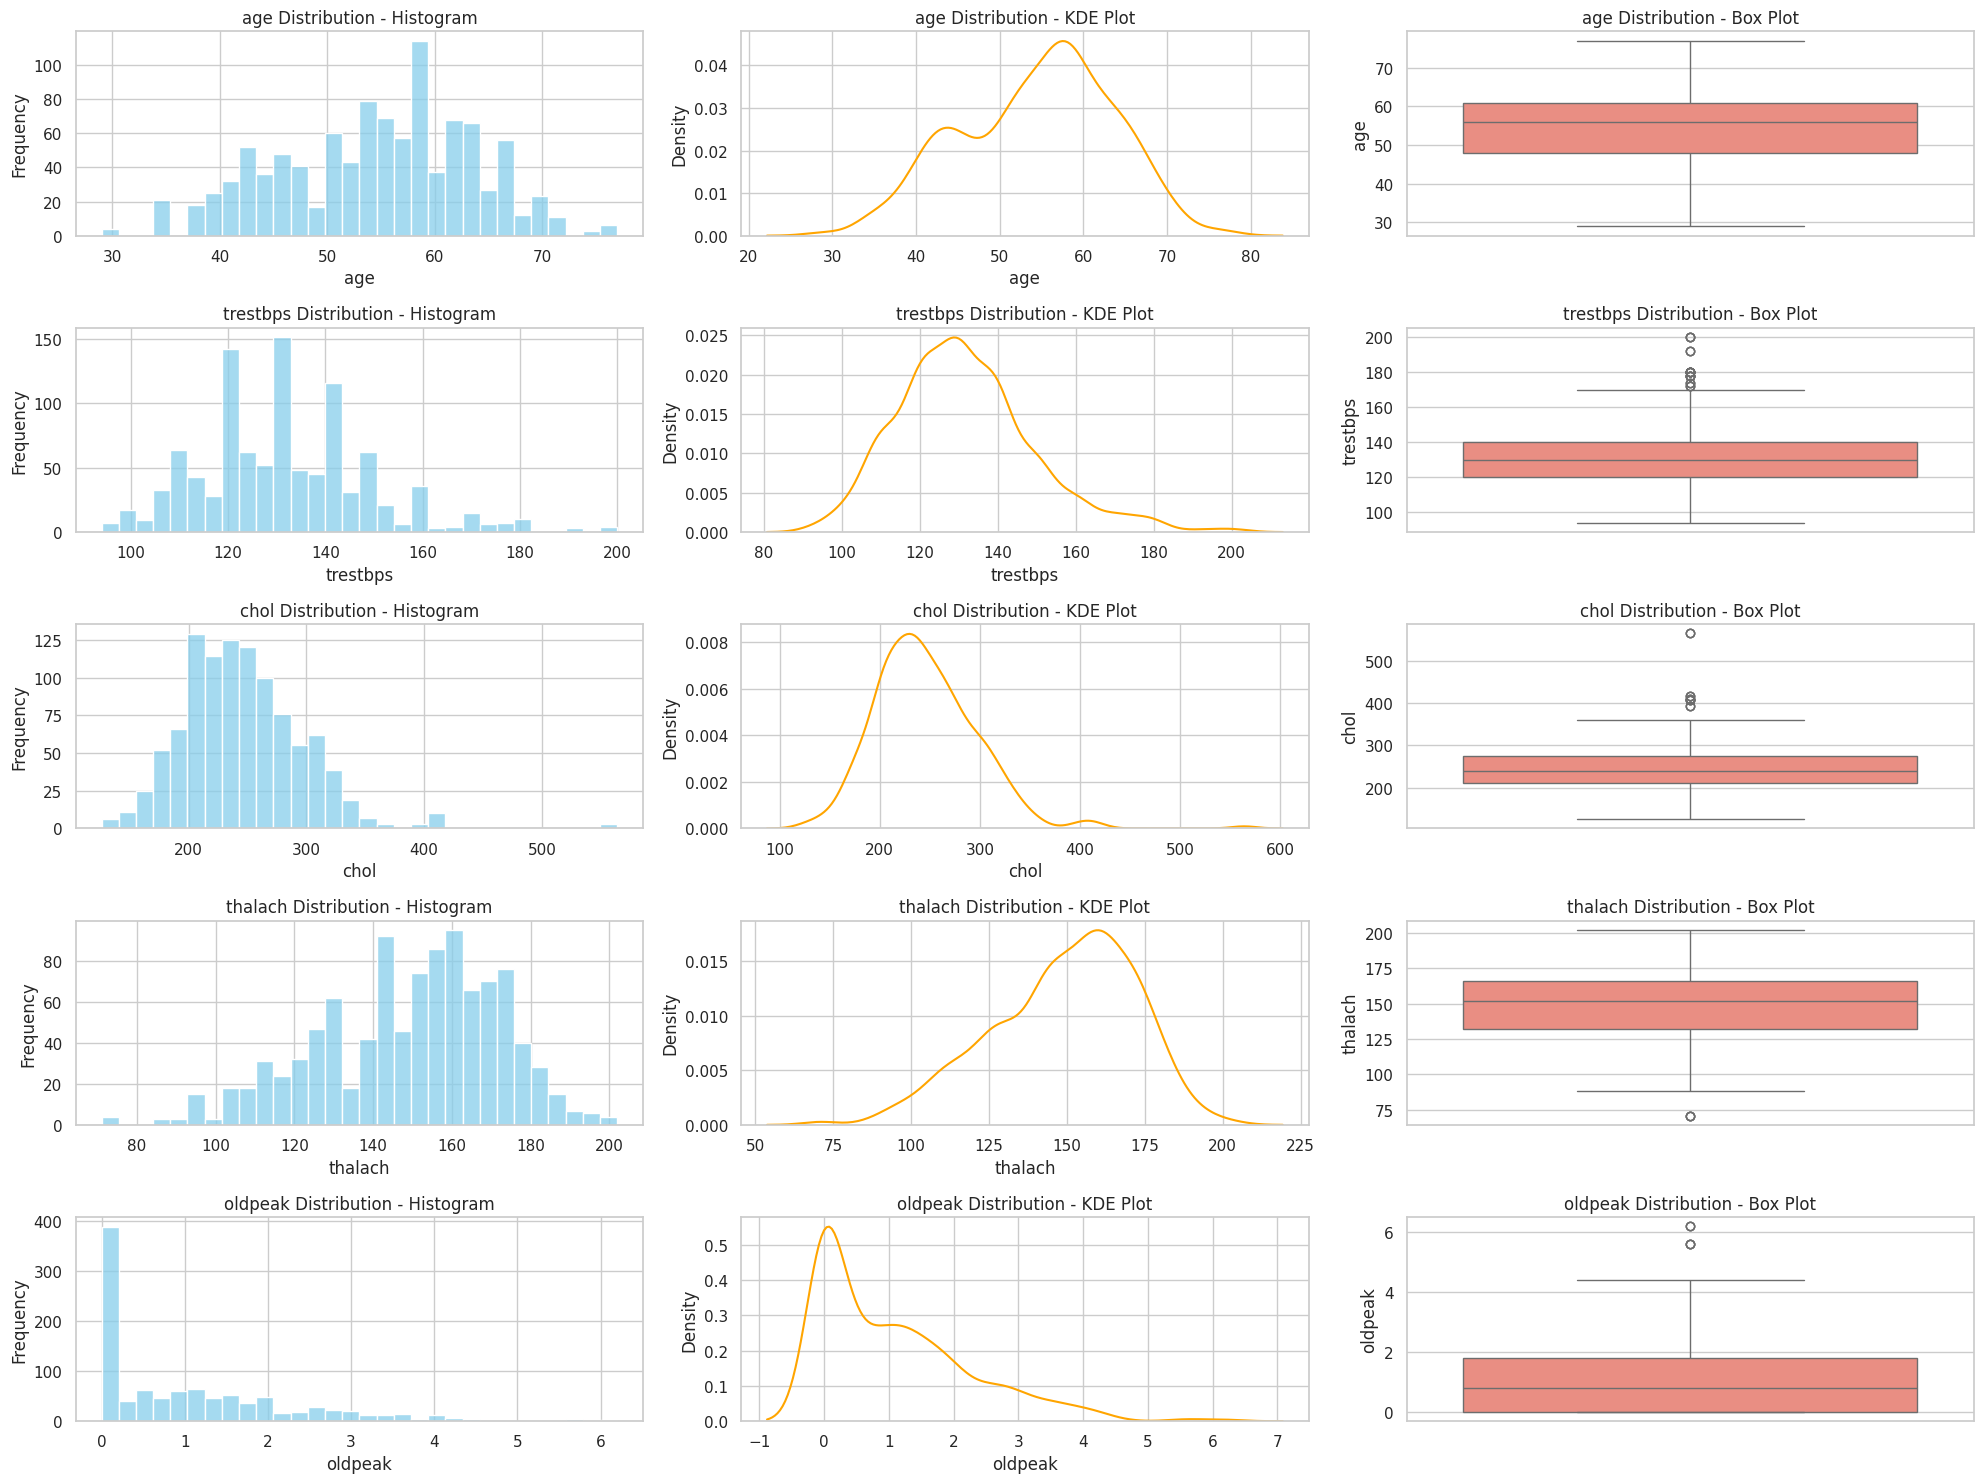

In [14]:
# Set the style for the plots
sns.set(style="whitegrid")

# List of numeric columns for which you want to create plots (excluding 'age' and 'sex')
numeric_columns = ["age", "trestbps", "chol", "thalach", "oldpeak"]

# Set the figure size
fig, axes = plt.subplots(5, 3, figsize=(20, 15))

# Function to create histograms, KDE, and box plots for each column
def plot_distribution(column, data_frame, cor, title, label):
    # Plot Histogram
    sns.histplot(data_frame[column], kde=False, ax=axes[cor[0], 0], color='skyblue', bins=30)
    axes[cor[0], 0].set_title(f'{title} - Histogram')
    axes[cor[0], 0].set_xlabel(label)
    axes[cor[0], 0].set_ylabel('Frequency')
    # Plot KDE Plot
    sns.kdeplot(data=data_frame[column], ax=axes[cor[0], 1], color='orange')
    axes[cor[0], 1].set_title(f'{title} - KDE Plot')

    # Plot Boxplot
    sns.boxplot(y=data_frame[column], ax=axes[cor[0], 2], color='salmon')
    axes[cor[0], 2].set_title(f'{title} - Box Plot')

# Loop through the numeric columns and plot the distributions
for i, column in enumerate(numeric_columns):
    plot_distribution(column, df, (i, 0), f'{column} Distribution', column)

# Adjust layout to avoid overlapping and improve spacing
plt.tight_layout()

# Show the plot
plt.show()

In [15]:
# List of numeric columns to calculate skewness and kurtosis
numeric_columns = ["age", "trestbps", "chol", "thalach", "oldpeak"]

# Create a dictionary to store skewness and kurtosis values
skew_kurt_data = {}

# Loop through the numeric columns and calculate skewness and kurtosis
for column in numeric_columns:
    skew_kurt_data[column] = {
        'Skewness': df[column].skew(),
        'Kurtosis': df[column].kurt()
    }

# Convert the dictionary to a DataFrame
skew_kurt_df = pd.DataFrame(skew_kurt_data).T

# Display the DataFrame
(skew_kurt_df)

,Skewness,Kurtosis
age,-0.248866,-0.525618
trestbps,0.739768,0.991221
chol,1.074073,3.996803
thalach,-0.513777,-0.088822
oldpeak,1.210899,1.314471


Data Exploration
Age: Distribusi usia menyerupai distribusi normal, dengan mayoritas individu berusia antara 40 hingga 60 tahun.

Sex: Dataset ini lebih banyak mengandung laki-laki (M) dibandingkan perempuan (F).

Chest Pain Type (ChestPainType): Di antara kategori (ATA, NAP, ASY, TA), kategori "ASY" paling umum, menunjukkan bahwa banyak individu mungkin mengalami gejala yang tidak khas.

Resting Blood Pressure (RestingBP): Nilai tekanan darah istirahat berpusat di sekitar 120 mmHg, dengan sedikit kecenderungan ke arah nilai yang lebih tinggi.

Cholesterol (Chol): Data kolesterol mengikuti distribusi yang hampir normal, dengan sebagian besar nilai berada antara 150 hingga 300 mg/dL, menunjukkan tingkat kolesterol yang bervariasi dalam populasi.

Fasting Blood Sugar (FastingBS): Sebagian besar orang dalam dataset memiliki gula darah puasa di bawah 1, menunjukkan bahwa gula darah puasa umumnya dalam kisaran normal.

Resting ECG (RestingECG): Mayoritas berada dalam kategori "Normal," dengan lebih sedikit kasus dalam kategori "ST" atau "LVH."

Max Heart Rate Achieved (MaxHR): Distribusi memuncak di sekitar 140-160 denyut per menit, menunjukkan batas detak jantung yang umum saat beraktivitas.

Exercise-Induced Angina (ExerciseAngina): Sebagian besar individu tidak mengalami angina yang dipicu oleh olahraga, seperti yang ditunjukkan oleh dominasi kategori "N."

Oldpeak (ST Depression): Sebagian besar nilai mendekati nol, menunjukkan hasil ECG saat latihan yang relatif normal bagi banyak peserta.

ST Slope (ST Slope): "Flat" adalah jenis kemiringan yang paling umum, diikuti oleh "Up," yang menunjukkan variabilitas pola ECG.

Heart Disease (target): Variabel target menunjukkan distribusi bimodal, yang mengindikasikan keberadaan dan ketiadaan kasus penyakit jantung.


Conclusion: Skewness and Kurtosis Analysis
Age:

Skewness: -0.25 (skewness negatif ringan, distribusi sedikit miring ke kanan).
Kurtosis: -0.53 (distribusi platikurtik, lebih sedikit nilai ekstrem dibandingkan distribusi normal).
Resting Blood Pressure (Trestbps):

Skewness: 0.74 (skewness positif, distribusi sedikit miring ke kiri).
Kurtosis: 0.99 (distribusi mendekati normal dengan ekor moderat).
Cholesterol (Chol):

Skewness: 1.07 (skewness positif, distribusi sedikit miring ke kiri).
Kurtosis: 3.99 (distribusi leptokurtik, lebih banyak nilai ekstrem dibandingkan distribusi normal).
Max Heart Rate Achieved (Thalach):

Skewness: -0.51 (skewness negatif ringan, distribusi sedikit miring ke kanan).
Kurtosis: -0.09 (distribusi platikurtik, lebih sedikit nilai ekstrem dibandingkan distribusi normal).
Oldpeak (ST Depression):

Skewness: 1.21 (skewness positif, distribusi miring ke kiri).
Kurtosis: 1.31 (distribusi platikurtik, lebih sedikit nilai ekstrem dibandingkan distribusi normal).

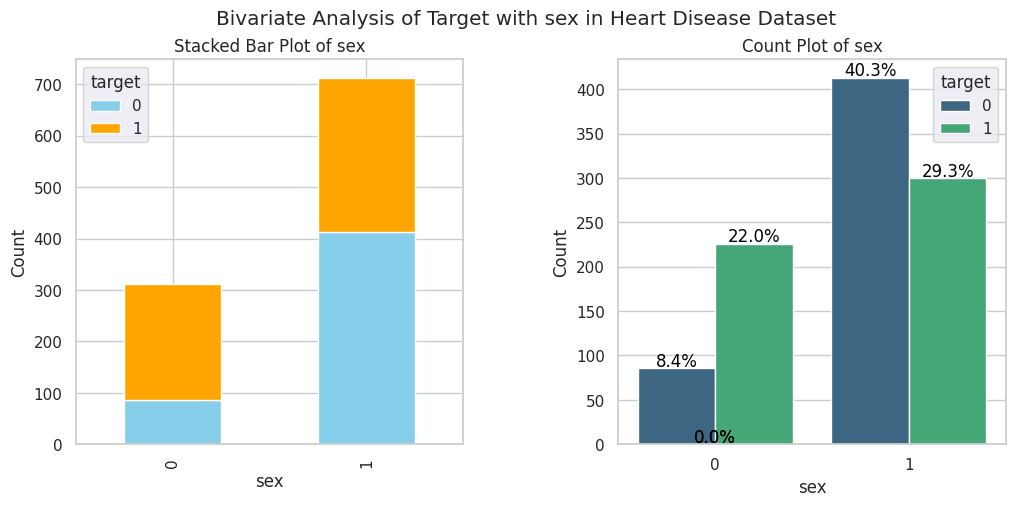

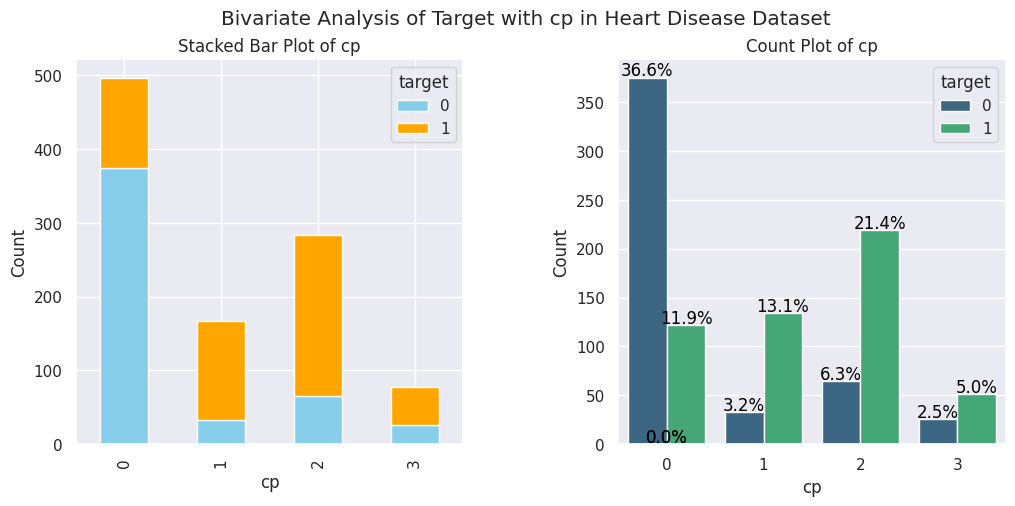

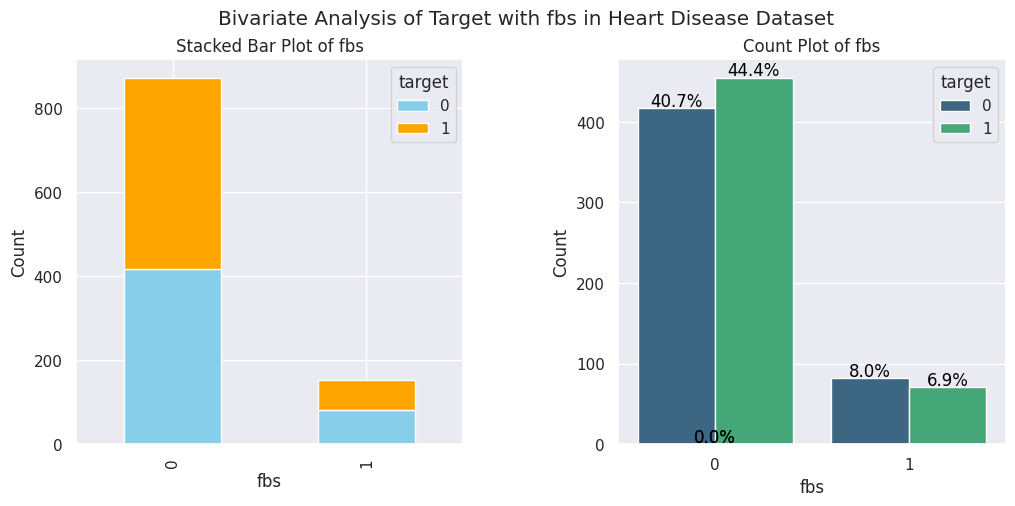

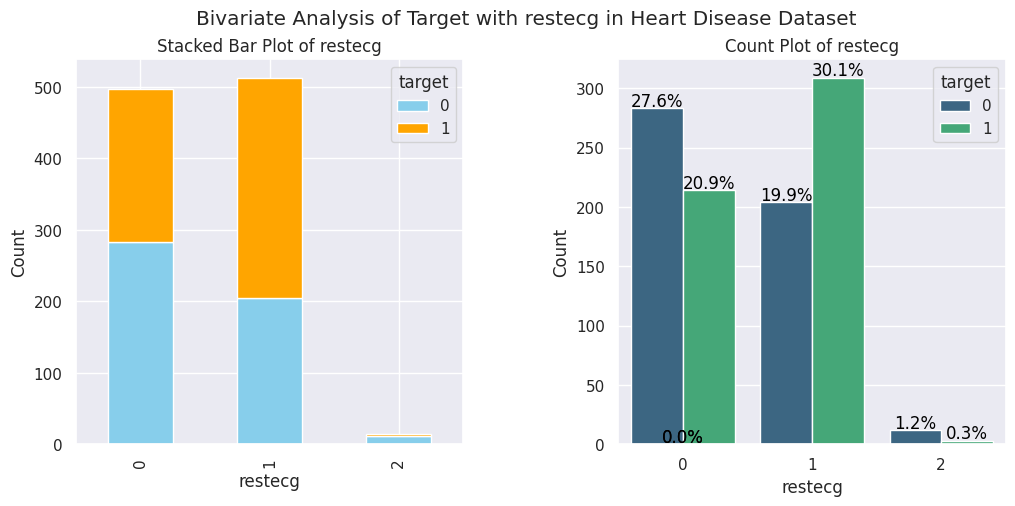

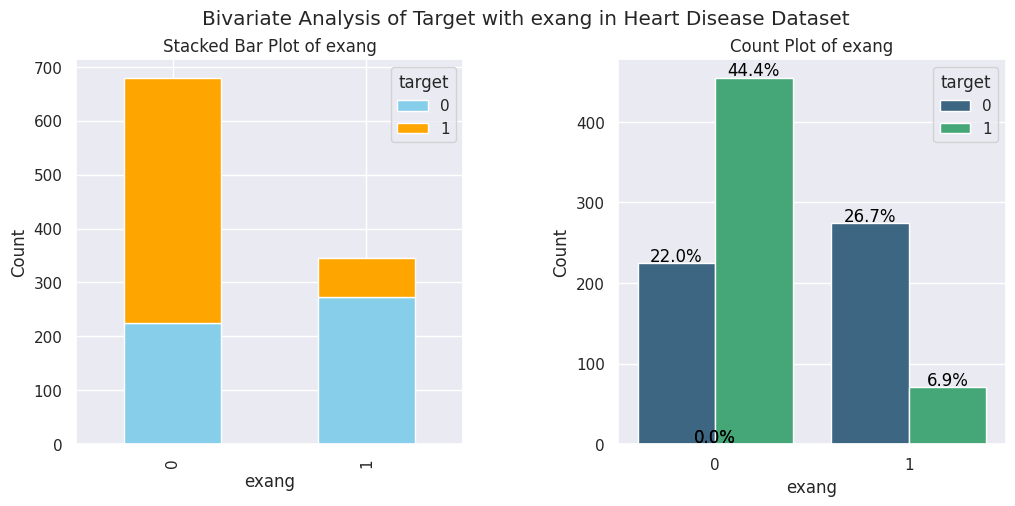

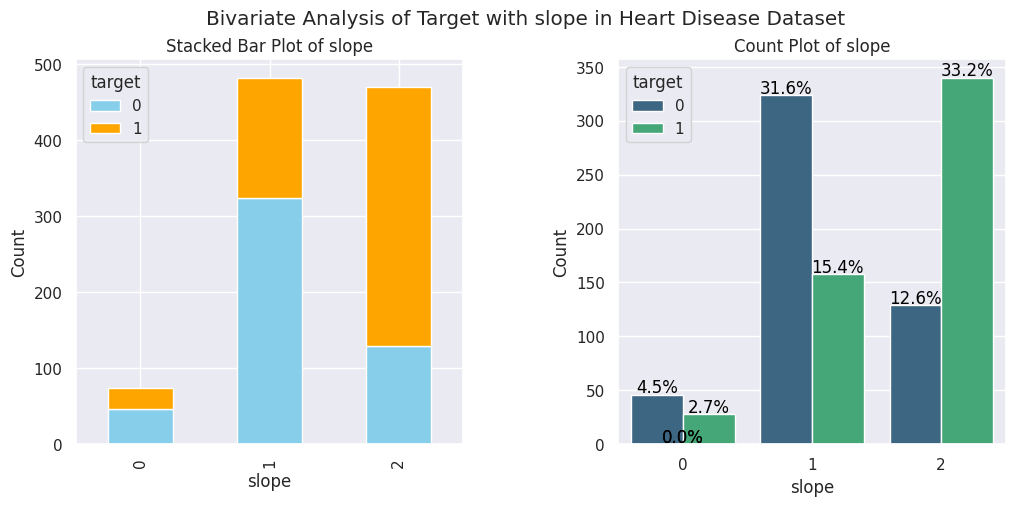

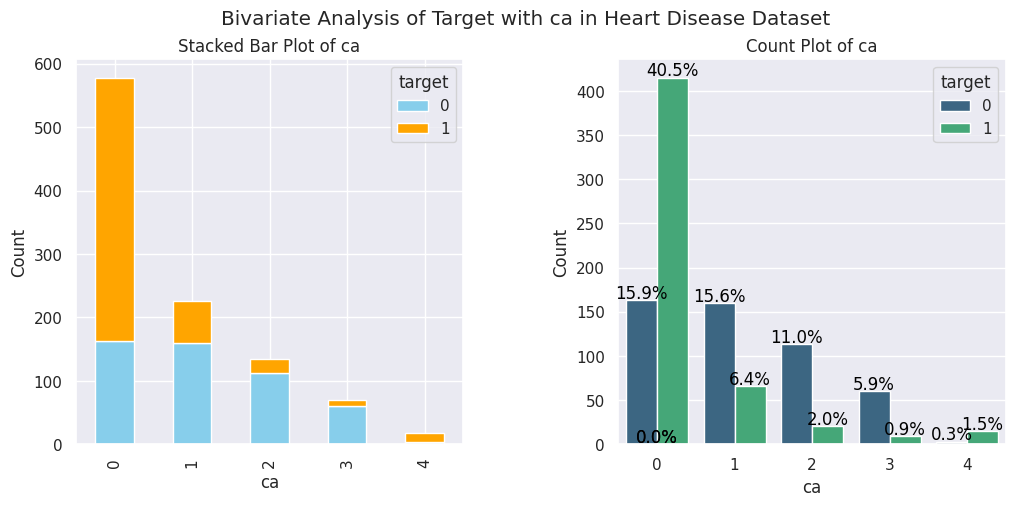

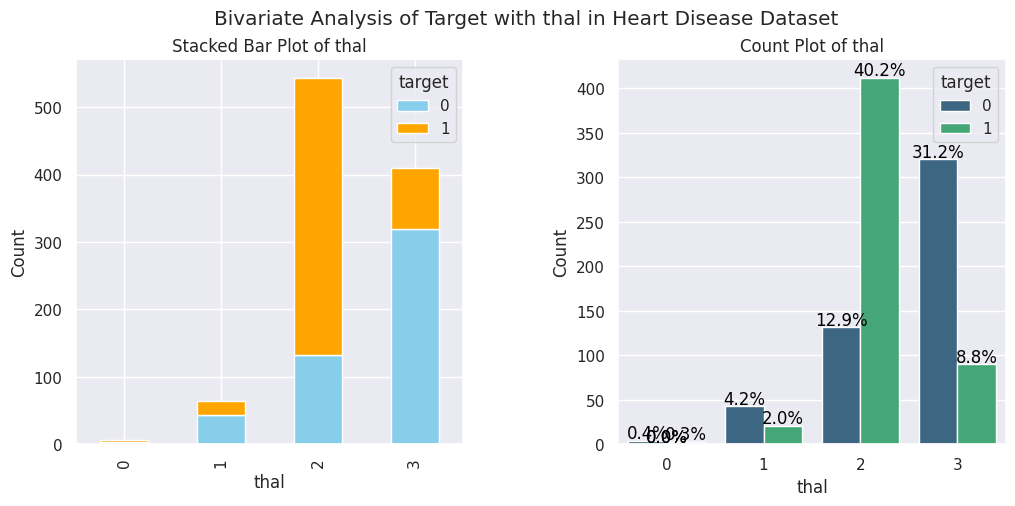

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def plot_categorical_bivariate_analysis(feature):
    # Set up subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(f'Bivariate Analysis of Target with {feature} in Heart Disease Dataset')
    plt.subplots_adjust(wspace=0.4)
    sns.set_style('darkgrid')

    # Stacked Bar Plot with Percentage
    crosstab = pd.crosstab(df[feature], df['target'])
    crosstab_pct = crosstab.div(crosstab.sum(1), axis=0) * 100  # Calculate percentage
    crosstab.plot(kind='bar', stacked=True, ax=axes[0], color=['skyblue', 'orange'])
    axes[0].set_title(f'Stacked Bar Plot of {feature}')
    axes[0].set_xlabel(f'{feature}')
    axes[0].set_ylabel('Count')

    # Count Plot with Percentage
    sns.countplot(data=df, x=feature, hue='target', ax=axes[1], palette='viridis')
    total = len(df)
    for p in axes[1].patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        axes[1].annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', color='black', xytext=(0, 5),
                         textcoords='offset points')

    axes[1].set_title(f'Count Plot of {feature}')
    axes[1].set_xlabel(f'{feature}')
    axes[1].set_ylabel('Count')

    plt.show()

# Example Usage
columns = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
for col in columns:
    plot_categorical_bivariate_analysis(col)
    plt.savefig(f'bivariate_analysis_{col}.png')
    plt.close()  # Close the figure to avoid overlap in subsequent plots


<ipython-input-17-232073f26004>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[categorical_feature], y=df[numerical_feature], ax=axes[0], palette='viridis')
<ipython-input-17-232073f26004>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=df[categorical_feature], y=df[numerical_feature], ax=axes[1], estimator=np.mean, ci='sd', palette='Blues_d')
<ipython-input-17-232073f26004>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[categorical_feature], y=df[numerical_feature], ax=axes[1], estimator=np.mean, ci='sd', palette='Blues_d')


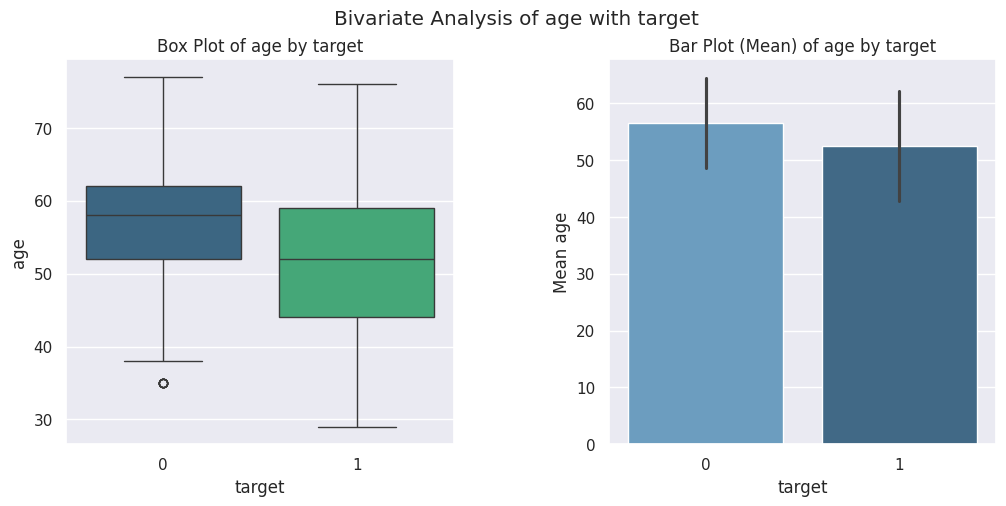

<ipython-input-17-232073f26004>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[categorical_feature], y=df[numerical_feature], ax=axes[0], palette='viridis')
<ipython-input-17-232073f26004>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=df[categorical_feature], y=df[numerical_feature], ax=axes[1], estimator=np.mean, ci='sd', palette='Blues_d')
<ipython-input-17-232073f26004>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[categorical_feature], y=df[numerical_feature], ax=axes[1], estimator=np.mean, ci='sd', palette='Blues_d')


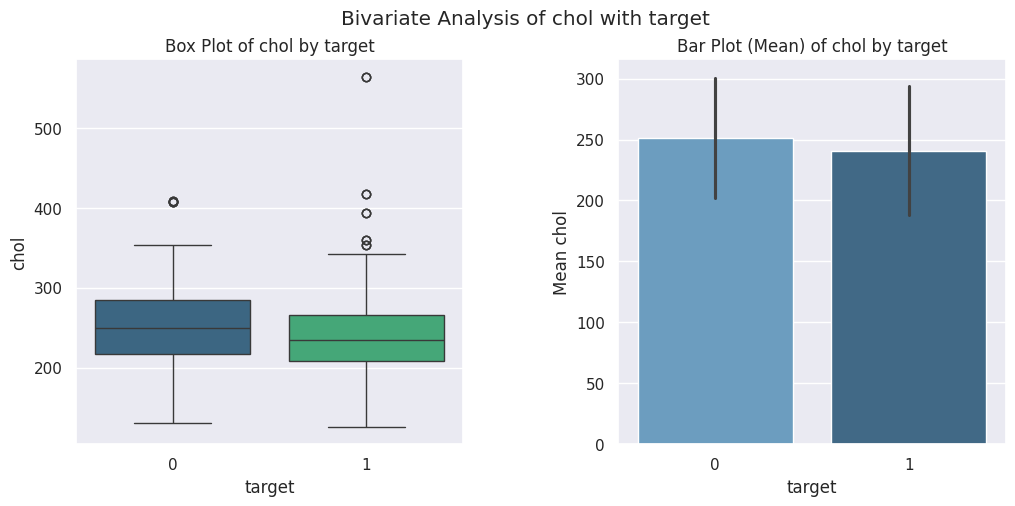

<ipython-input-17-232073f26004>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[categorical_feature], y=df[numerical_feature], ax=axes[0], palette='viridis')
<ipython-input-17-232073f26004>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=df[categorical_feature], y=df[numerical_feature], ax=axes[1], estimator=np.mean, ci='sd', palette='Blues_d')
<ipython-input-17-232073f26004>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[categorical_feature], y=df[numerical_feature], ax=axes[1], estimator=np.mean, ci='sd', palette='Blues_d')


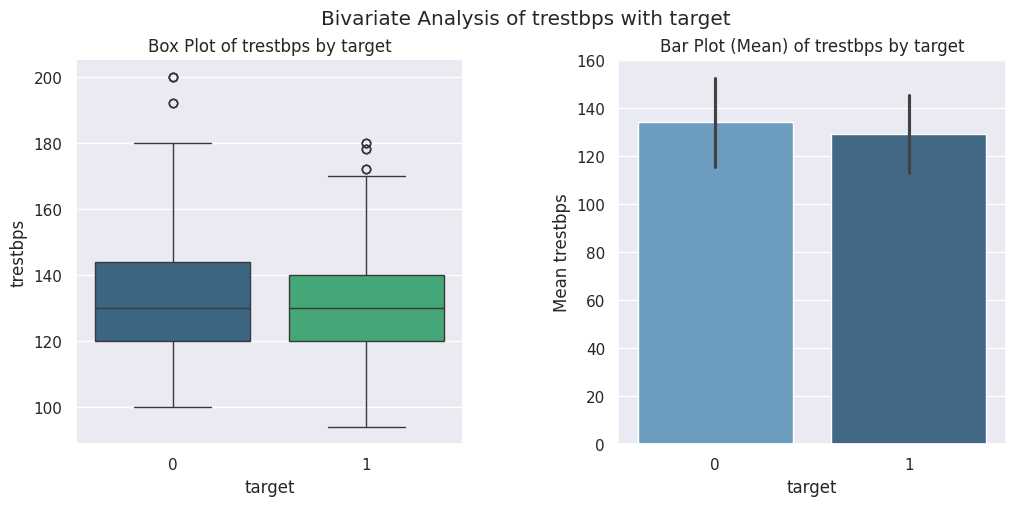

<ipython-input-17-232073f26004>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[categorical_feature], y=df[numerical_feature], ax=axes[0], palette='viridis')
<ipython-input-17-232073f26004>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=df[categorical_feature], y=df[numerical_feature], ax=axes[1], estimator=np.mean, ci='sd', palette='Blues_d')
<ipython-input-17-232073f26004>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[categorical_feature], y=df[numerical_feature], ax=axes[1], estimator=np.mean, ci='sd', palette='Blues_d')


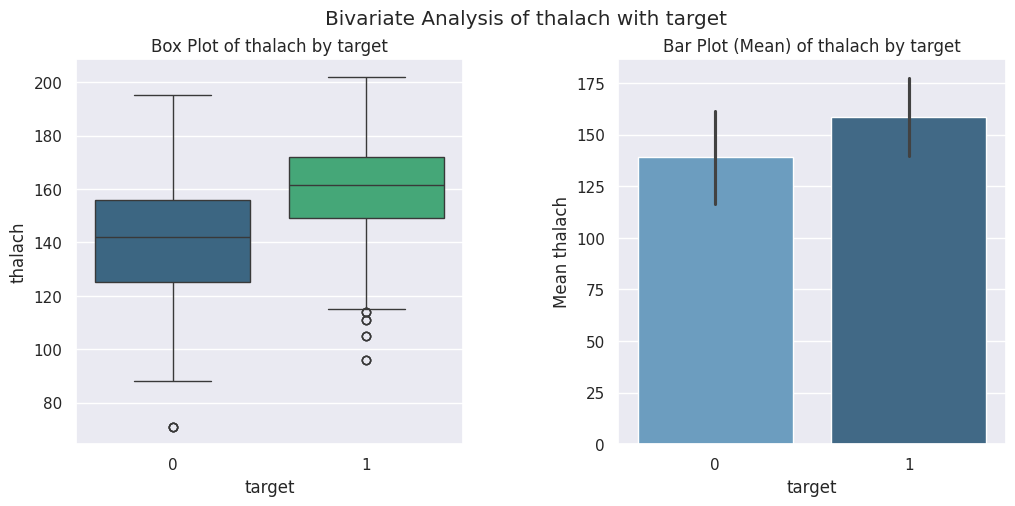

<ipython-input-17-232073f26004>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[categorical_feature], y=df[numerical_feature], ax=axes[0], palette='viridis')
<ipython-input-17-232073f26004>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=df[categorical_feature], y=df[numerical_feature], ax=axes[1], estimator=np.mean, ci='sd', palette='Blues_d')
<ipython-input-17-232073f26004>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[categorical_feature], y=df[numerical_feature], ax=axes[1], estimator=np.mean, ci='sd', palette='Blues_d')


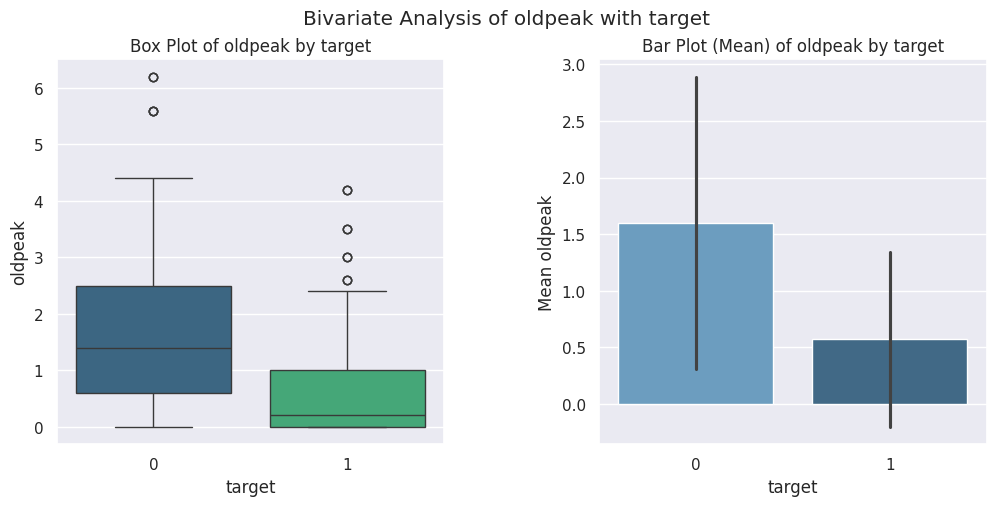

In [17]:
def plot_numerical_categorical_analysis(numerical_feature, categorical_feature):
    # Set up subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(f'Bivariate Analysis of {numerical_feature} with {categorical_feature}')
    plt.subplots_adjust(wspace=0.4)
    sns.set_style('darkgrid')

    # Box Plot
    sns.boxplot(x=df[categorical_feature], y=df[numerical_feature], ax=axes[0], palette='viridis')
    axes[0].set_title(f'Box Plot of {numerical_feature} by {categorical_feature}')
    axes[0].set_xlabel(categorical_feature)
    axes[0].set_ylabel(numerical_feature)

    # Bar Plot (with mean aggregation)
    sns.barplot(x=df[categorical_feature], y=df[numerical_feature], ax=axes[1], estimator=np.mean, ci='sd', palette='Blues_d')
    axes[1].set_title(f'Bar Plot (Mean) of {numerical_feature} by {categorical_feature}')
    axes[1].set_xlabel(categorical_feature)
    axes[1].set_ylabel(f'Mean {numerical_feature}')

    plt.show()

# Example Usage:
plot_numerical_categorical_analysis('age', 'target')
plot_numerical_categorical_analysis('chol', 'target')
plot_numerical_categorical_analysis('trestbps', 'target')
plot_numerical_categorical_analysis('thalach', 'target')
plot_numerical_categorical_analysis('oldpeak', 'target')


target
1    526
0    499
Name: count, dtype: int64


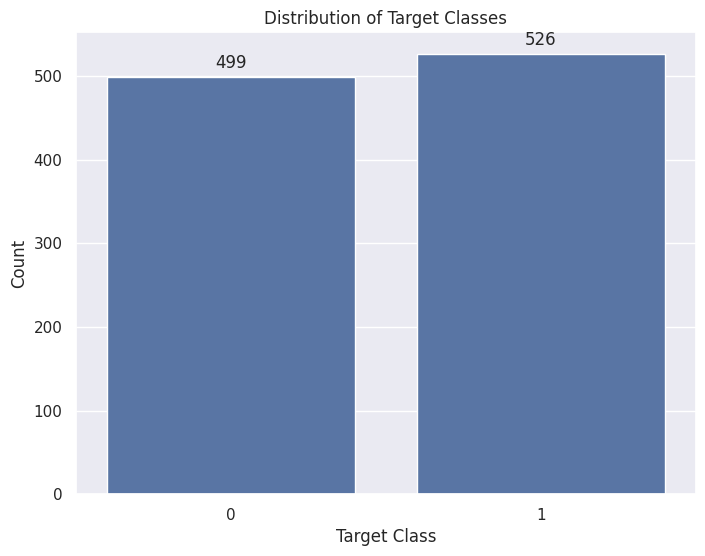

In [18]:

# Calculate class proportions
class_counts = df['target'].value_counts()
print(class_counts)
# Create the bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Classes')
plt.xlabel('Target Class')
plt.ylabel('Count')

# Annotate the bars with their respective counts
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

MODELING

In [19]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Buat salinan DataFrame asli
scaled_df = df.copy(deep=True)

# Inisialisasi scaler
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Kolom numerik yang akan di-scaling
numerical_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]

# Lakukan scaling untuk setiap kolom numerik
for feature in numerical_features:
    # Terapkan MinMaxScaler terlebih dahulu
    scaled_df[feature] = min_max_scaler.fit_transform(scaled_df[[feature]])

    # Kemudian terapkan StandardScaler
    scaled_df[feature] = standard_scaler.fit_transform(scaled_df[[feature]])

# Tampilkan DataFrame yang sudah di-scaling
scaled_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.268437,1,0,-0.377636,-0.659332,0,1,0.821321,0,-0.060888,2,2,3,0
1,-0.158157,1,0,0.479107,-0.833861,1,0,0.255968,1,1.727137,0,0,3,0
2,1.716595,1,0,0.764688,-1.396233,0,1,-1.048692,1,1.301417,0,0,3,0
3,0.724079,1,0,0.936037,-0.833861,0,1,0.516900,0,-0.912329,2,1,3,0
4,0.834359,0,0,0.364875,0.930822,1,1,-1.874977,0,0.705408,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,1,1,0.479107,-0.484803,0,1,0.647366,1,-0.912329,2,0,2,1
1021,0.613800,1,0,-0.377636,0.232705,0,0,-0.352873,1,1.471705,1,1,3,0
1022,-0.819834,1,0,-1.234378,0.562371,0,0,-1.353113,1,-0.060888,1,1,2,0
1023,-0.488996,0,0,-1.234378,0.155137,0,0,0.429923,0,-0.912329,2,0,2,1


In [20]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming 'scaled_df' is your DataFrame from the previous cell
categorical_columns = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]

# Apply OneHotEncoder to categorical columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # Handle unknown categories

# Transform the categorical columns and create a DataFrame
encoded_df = pd.DataFrame(encoder.fit_transform(scaled_df[categorical_columns]),
                          columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the original numerical columns with the encoded categorical columns
final_df = pd.concat([scaled_df.drop(categorical_columns, axis=1), encoded_df], axis=1)

# Display the final DataFrame
final_df

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.834359,0.364875,0.930822,-1.874977,0.705408,0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,0.479107,-0.484803,0.647366,-0.912329,1,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1021,0.613800,-0.377636,0.232705,-0.352873,1.471705,0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1022,-0.819834,-1.234378,0.562371,-1.353113,-0.060888,0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1023,-0.488996,-1.234378,0.155137,0.429923,-0.912329,1,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
from sklearn.model_selection import train_test_split # Importing the necessary function

X = final_df.drop('target', axis=1)
y = final_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Now the function is defined

MODEL MACHINE LEARNING

**Random Forest**

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       159
           1       1.00      0.98      0.99       149

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



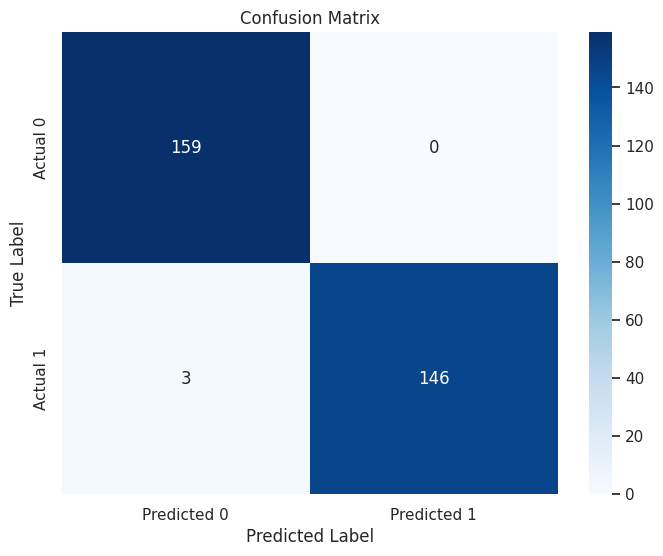

In [22]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Inisialisasi model Random Forest
rf_classifier = RandomForestClassifier(random_state=42)

# Latih model
rf_classifier.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = rf_classifier.predict(X_test)

# Evaluasi model
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**xgboost**

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       159
           1       1.00      0.96      0.98       149

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



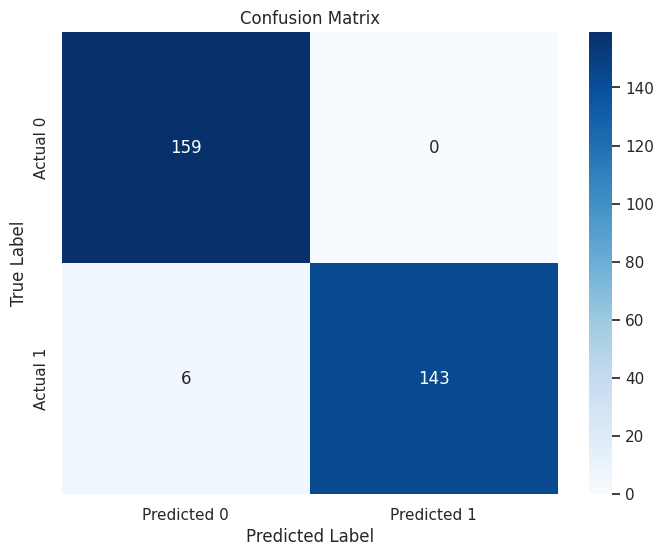

In [23]:


from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Your existing code for data preprocessing and feature engineering) ...

# Assuming 'X' and 'y' are your features and target variable from the preprocessed DataFrame
X = final_df.drop('target', axis=1)
y = final_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**SVM**

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       159
           1       0.87      0.95      0.90       149

    accuracy                           0.90       308
   macro avg       0.90      0.90      0.90       308
weighted avg       0.91      0.90      0.90       308



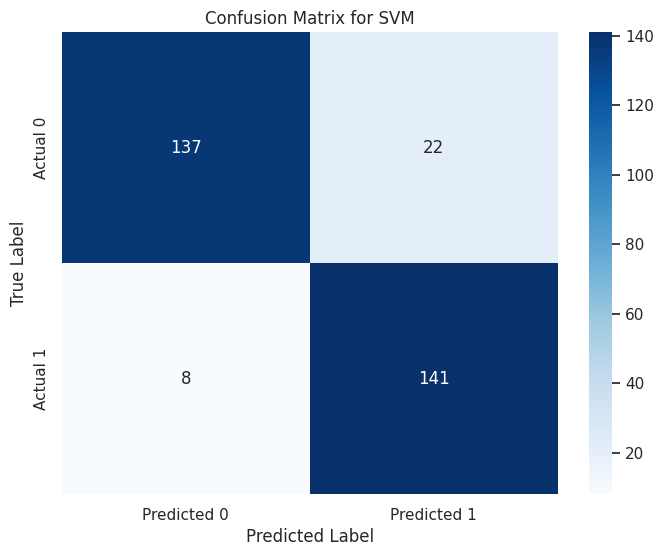

In [24]:

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

# ... (Your existing code for data preprocessing and feature engineering) ...

# Assuming 'X' and 'y' are your features and target variable
X = final_df.drop('target', axis=1)
y = final_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the SVM classifier
svm_classifier = SVC(random_state=42)  # You can adjust parameters like kernel, C, gamma
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test)

# Evaluate the model and print the classification report
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [25]:
import joblib

joblib.dump(rf_classifier, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [26]:
import joblib

joblib.dump(xgb_classifier, 'xgboost_model.pkl')

['xgboost_model.pkl']

In [27]:

joblib.dump(svm_classifier, 'svm_model.pkl')

['svm_model.pkl']